In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
ruta_archivo ="/content/drive/MyDrive/Fundamentos de estadística para la analítica de datos/Bases de datos/student-mat.csv"

In [4]:
datos = pd.read_csv(ruta_archivo, delimiter=';', na_values="-")
datos

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


## Datos
Los datos están [acá](https://archive.ics.uci.edu/dataset/320/student+performance)


extra educational support (binary: yes or no)

* student's age (numeric: from 15 to 22)
* student's home address type (binary: 'U' - urban or 'R' - rural)
* student's guardian (nominal: 'mother', 'father' or 'other')
* weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
* extra-curricular activities (binary: yes or no)
* wants to take higher education (binary: yes or no)
* Internet access at home (binary: yes or no)
* with a romantic relationship (binary: yes or no)


In [5]:
columnas_seleccionadas = ['schoolsup','age', 'address', 'guardian', 'studytime', 'activities', 'higher', 'internet', 'romantic']

In [6]:
data =datos[columnas_seleccionadas]
data

,schoolsup,age,address,guardian,studytime,activities,higher,internet,romantic
0,yes,18,U,mother,2,no,yes,no,no
1,no,17,U,father,2,no,yes,yes,no
2,yes,15,U,mother,2,no,yes,yes,no
3,no,15,U,mother,3,yes,yes,yes,yes
4,no,16,U,father,2,no,yes,no,no
...,...,...,...,...,...,...,...,...,...
390,no,20,U,other,2,no,yes,no,no
391,no,17,U,mother,1,no,yes,yes,no
392,no,21,R,other,1,no,yes,no,no
393,no,18,R,mother,1,no,yes,yes,no


In [7]:
# Convertir la variable objetivo a valores binarios utilizando .loc para evitar SettingWithCopyWarning
data.loc[:, 'schoolsup'] = data['schoolsup'].map({'yes': 1, 'no': 0})

In [8]:
data['address'].value_counts().sort_index()

address
R     88
U    307
Name: count, dtype: int64

In [9]:
data

,schoolsup,age,address,guardian,studytime,activities,higher,internet,romantic
0,1,18,U,mother,2,no,yes,no,no
1,0,17,U,father,2,no,yes,yes,no
2,1,15,U,mother,2,no,yes,yes,no
3,0,15,U,mother,3,yes,yes,yes,yes
4,0,16,U,father,2,no,yes,no,no
...,...,...,...,...,...,...,...,...,...
390,0,20,U,other,2,no,yes,no,no
391,0,17,U,mother,1,no,yes,yes,no
392,0,21,R,other,1,no,yes,no,no
393,0,18,R,mother,1,no,yes,yes,no


In [10]:
# Codificar la variable categórica 'sector' utilizando One-Hot Encoding
data_encoded1 = pd.get_dummies(data, columns=['address'], drop_first=True)

In [11]:
data_encoded1

,schoolsup,age,guardian,studytime,activities,higher,internet,romantic,address_U
0,1,18,mother,2,no,yes,no,no,True
1,0,17,father,2,no,yes,yes,no,True
2,1,15,mother,2,no,yes,yes,no,True
3,0,15,mother,3,yes,yes,yes,yes,True
4,0,16,father,2,no,yes,no,no,True
...,...,...,...,...,...,...,...,...,...
390,0,20,other,2,no,yes,no,no,True
391,0,17,mother,1,no,yes,yes,no,True
392,0,21,other,1,no,yes,no,no,False
393,0,18,mother,1,no,yes,yes,no,False


In [12]:
data['guardian'].value_counts().sort_index()

guardian
father     90
mother    273
other      32
Name: count, dtype: int64

In [13]:
# Codificar la variable categórica 'guardian' utilizando One-Hot Encoding
data_encoded2 = pd.get_dummies(data_encoded1, columns=['guardian'], drop_first=True)
data_encoded2

,schoolsup,age,studytime,activities,higher,internet,romantic,address_U,guardian_mother,guardian_other
0,1,18,2,no,yes,no,no,True,True,False
1,0,17,2,no,yes,yes,no,True,False,False
2,1,15,2,no,yes,yes,no,True,True,False
3,0,15,3,yes,yes,yes,yes,True,True,False
4,0,16,2,no,yes,no,no,True,False,False
...,...,...,...,...,...,...,...,...,...,...
390,0,20,2,no,yes,no,no,True,False,True
391,0,17,1,no,yes,yes,no,True,True,False
392,0,21,1,no,yes,no,no,False,False,True
393,0,18,1,no,yes,yes,no,False,True,False


In [14]:
categoricas=['activities', 'higher', 'internet', 'romantic']

In [15]:
# Convertir las columnas categóricas a valores binarios utilizando .loc para evitar SettingWithCopyWarning
for column in categoricas:
    data_encoded2.loc[:, column] = data_encoded2[column].map({'yes': 1, 'no': 0})

In [16]:
data_encoded2


,schoolsup,age,studytime,activities,higher,internet,romantic,address_U,guardian_mother,guardian_other
0,1,18,2,0,1,0,0,True,True,False
1,0,17,2,0,1,1,0,True,False,False
2,1,15,2,0,1,1,0,True,True,False
3,0,15,3,1,1,1,1,True,True,False
4,0,16,2,0,1,0,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...
390,0,20,2,0,1,0,0,True,False,True
391,0,17,1,0,1,1,0,True,True,False
392,0,21,1,0,1,0,0,False,False,True
393,0,18,1,0,1,1,0,False,True,False


In [17]:
# Convertir cualquier columna booleana a entero
for col in data_encoded2.select_dtypes(include=['bool']).columns:
    data_encoded2[col] = data_encoded2[col].astype(int)

In [18]:
data_encoded2

,schoolsup,age,studytime,activities,higher,internet,romantic,address_U,guardian_mother,guardian_other
0,1,18,2,0,1,0,0,1,1,0
1,0,17,2,0,1,1,0,1,0,0
2,1,15,2,0,1,1,0,1,1,0
3,0,15,3,1,1,1,1,1,1,0
4,0,16,2,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
390,0,20,2,0,1,0,0,1,0,1
391,0,17,1,0,1,1,0,1,1,0
392,0,21,1,0,1,0,0,0,0,1
393,0,18,1,0,1,1,0,0,1,0


In [19]:
# Asegurarse de que todas las columnas de X son numéricas utilizando pd.to_numeric
for col in data_encoded2.columns:
    data_encoded2[col] = pd.to_numeric(data_encoded2[col], errors='coerce')

In [23]:
# Separar las características y el objetivo
X = data_encoded2.drop(columns='schoolsup')
y = data_encoded2['schoolsup']

In [20]:
# Asegurarse de que todas las columnas de X son numéricas utilizando pd.to_numeric
for col in data_encoded2.columns:
    data_encoded2[col] = pd.to_numeric(data_encoded2[col], errors='coerce')

In [21]:
print(data_encoded2.dtypes)

schoolsup          int64
age                int64
studytime          int64
activities         int64
higher             int64
internet           int64
romantic           int64
address_U          int64
guardian_mother    int64
guardian_other     int64
dtype: object


In [24]:
# Añadir una columna de constantes para el modelo
X = sm.add_constant(X)

# Ajustar el modelo de regresión logística
modelo_logit = sm.Logit(y, X).fit()

# Mostrar el resumen del modelo
print(modelo_logit.summary())

Optimization terminated successfully.
         Current function value: 0.345285
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              schoolsup   No. Observations:                  395
Model:                          Logit   Df Residuals:                      385
Method:                           MLE   Df Model:                            9
Date:                Sat, 25 May 2024   Pseudo R-squ.:                  0.1025
Time:                        14:42:52   Log-Likelihood:                -136.39
converged:                       True   LL-Null:                       -151.96
Covariance Type:            nonrobust   LLR p-value:                 0.0002805
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              10.1620      3.028      3.356      0.001       4.227      16.097
age           

In [25]:
data_encoded2['prediccion_prob'] = modelo_logit.predict(X)
data_encoded2['prediccion'] = (data_encoded2['prediccion_prob'] >= 0.5).astype(int)
data_encoded2.head(10)

,schoolsup,age,studytime,activities,higher,internet,romantic,address_U,guardian_mother,guardian_other,prediccion_prob,prediccion
0,1,18,2,0,1,0,0,1,1,0,0.049622,0
1,0,17,2,0,1,1,0,1,0,0,0.081402,0
2,1,15,2,0,1,1,0,1,1,0,0.254746,0
3,0,15,3,1,1,1,1,1,1,0,0.252241,0
4,0,16,2,0,1,0,0,1,0,0,0.206701,0
5,0,16,2,1,1,1,0,1,1,0,0.163773,0
6,0,16,2,0,1,1,0,1,1,0,0.140296,0
7,1,17,2,0,1,0,0,1,1,0,0.098585,0
8,0,15,2,0,1,1,0,1,1,0,0.254746,0
9,0,15,2,1,1,1,0,1,1,0,0.290893,0


In [26]:
# Calcular el AUC
fpr, tpr, _ = roc_curve(data_encoded2['schoolsup'], data_encoded2['prediccion_prob'])
auc = roc_auc_score(data_encoded2['schoolsup'], data_encoded2['prediccion_prob'])
auc

0.7346671226630188

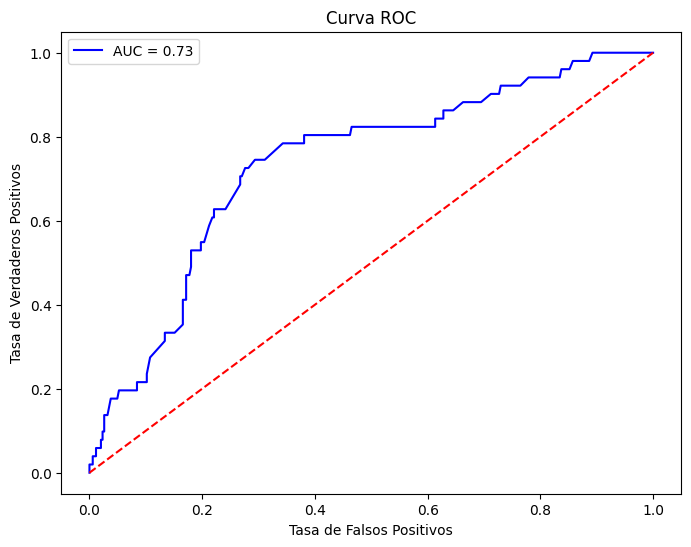

In [28]:
# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}', color='blue')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

$0.7≤AUC<0.8$:  Rendimiento aceptable

In [29]:
cm = confusion_matrix(data_encoded2['schoolsup'], data_encoded2['prediccion'])
print('\nMatriz de Confusión:')
print(cm)


Matriz de Confusión:
[[344   0]
 [ 51   0]]


In [30]:
# Reporte de clasificación
report = classification_report(data_encoded2['schoolsup'], data_encoded2['prediccion'])
print('\nReporte de Clasificación:')
print(report)


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       344
           1       0.00      0.00      0.00        51

    accuracy                           0.87       395
   macro avg       0.44      0.50      0.47       395
weighted avg       0.76      0.87      0.81       395



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


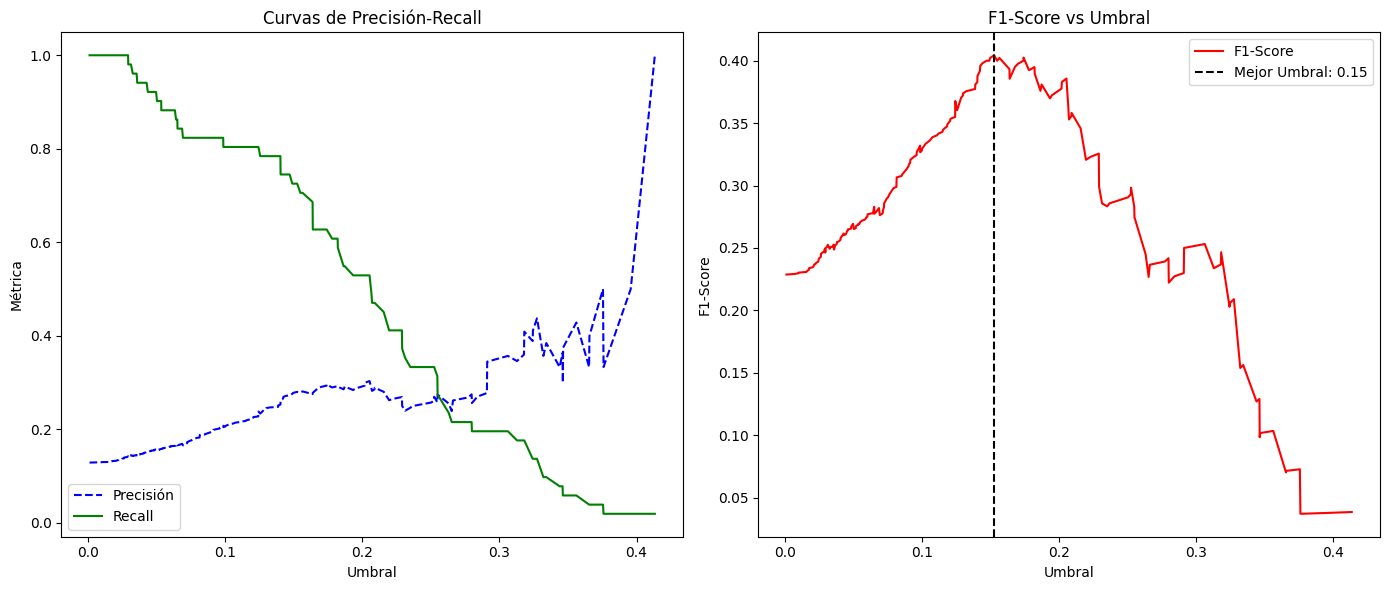

Mejor Umbral: 0.15
Mejor F1-Score: 0.40


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, f1_score
import statsmodels.api as sm

# Calcular las métricas para varios umbrales
precisions, recalls, thresholds = precision_recall_curve(data_encoded2['schoolsup'], data_encoded2['prediccion_prob'])
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]

# Graficar Precision-Recall y F1-Score
plt.figure(figsize=(14, 6))

# Curva Precision-Recall
plt.subplot(1, 2, 1)
plt.plot(thresholds, precisions[:-1], 'b--', label='Precisión')
plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
plt.xlabel('Umbral')
plt.ylabel('Métrica')
plt.title('Curvas de Precisión-Recall')
plt.legend()

# F1-Score
plt.subplot(1, 2, 2)
plt.plot(thresholds, f1_scores[:-1], 'r-', label='F1-Score')
plt.axvline(x=best_threshold, color='k', linestyle='--', label=f'Mejor Umbral: {best_threshold:.2f}')
plt.xlabel('Umbral')
plt.ylabel('F1-Score')
plt.title('F1-Score vs Umbral')
plt.legend()

plt.tight_layout()
plt.show()

# Imprimir el mejor umbral y la F1-score correspondiente
print(f'Mejor Umbral: {best_threshold:.2f}')
print(f'Mejor F1-Score: {f1_scores[best_threshold_index]:.2f}')


In [32]:
data_encoded2['prediccion_prob'] = modelo_logit.predict(X)
data_encoded2['prediccion'] = (data_encoded2['prediccion_prob'] >= 0.15).astype(int)
data_encoded2.head(10)

,schoolsup,age,studytime,activities,higher,internet,romantic,address_U,guardian_mother,guardian_other,prediccion_prob,prediccion
0,1,18,2,0,1,0,0,1,1,0,0.049622,0
1,0,17,2,0,1,1,0,1,0,0,0.081402,0
2,1,15,2,0,1,1,0,1,1,0,0.254746,1
3,0,15,3,1,1,1,1,1,1,0,0.252241,1
4,0,16,2,0,1,0,0,1,0,0,0.206701,1
5,0,16,2,1,1,1,0,1,1,0,0.163773,1
6,0,16,2,0,1,1,0,1,1,0,0.140296,0
7,1,17,2,0,1,0,0,1,1,0,0.098585,0
8,0,15,2,0,1,1,0,1,1,0,0.254746,1
9,0,15,2,1,1,1,0,1,1,0,0.290893,1


In [33]:
cm = confusion_matrix(data_encoded2['schoolsup'], data_encoded2['prediccion'])
print('\nMatriz de Confusión:')
print(cm)


Matriz de Confusión:
[[249  95]
 [ 14  37]]


In [34]:
# Reporte de clasificación
report = classification_report(data_encoded2['schoolsup'], data_encoded2['prediccion'])
print('\nReporte de Clasificación:')
print(report)


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.72      0.82       344
           1       0.28      0.73      0.40        51

    accuracy                           0.72       395
   macro avg       0.61      0.72      0.61       395
weighted avg       0.86      0.72      0.77       395



In [35]:
data_encoded2['prediccion_prob'] = modelo_logit.predict(X)
data_encoded2['prediccion'] = (data_encoded2['prediccion_prob'] >= 0.25).astype(int)
data_encoded2.head(10)

,schoolsup,age,studytime,activities,higher,internet,romantic,address_U,guardian_mother,guardian_other,prediccion_prob,prediccion
0,1,18,2,0,1,0,0,1,1,0,0.049622,0
1,0,17,2,0,1,1,0,1,0,0,0.081402,0
2,1,15,2,0,1,1,0,1,1,0,0.254746,1
3,0,15,3,1,1,1,1,1,1,0,0.252241,1
4,0,16,2,0,1,0,0,1,0,0,0.206701,0
5,0,16,2,1,1,1,0,1,1,0,0.163773,0
6,0,16,2,0,1,1,0,1,1,0,0.140296,0
7,1,17,2,0,1,0,0,1,1,0,0.098585,0
8,0,15,2,0,1,1,0,1,1,0,0.254746,1
9,0,15,2,1,1,1,0,1,1,0,0.290893,1


In [36]:
cm = confusion_matrix(data_encoded2['schoolsup'], data_encoded2['prediccion'])
print('\nMatriz de Confusión:')
print(cm)


Matriz de Confusión:
[[295  49]
 [ 34  17]]


In [37]:
# Reporte de clasificación
report = classification_report(data_encoded2['schoolsup'], data_encoded2['prediccion'])
print('\nReporte de Clasificación:')
print(report)


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       344
           1       0.26      0.33      0.29        51

    accuracy                           0.79       395
   macro avg       0.58      0.60      0.58       395
weighted avg       0.81      0.79      0.80       395



Regresión Logística Multinomial

In [38]:
data =datos[columnas_seleccionadas]
data

,schoolsup,age,address,guardian,studytime,activities,higher,internet,romantic
0,yes,18,U,mother,2,no,yes,no,no
1,no,17,U,father,2,no,yes,yes,no
2,yes,15,U,mother,2,no,yes,yes,no
3,no,15,U,mother,3,yes,yes,yes,yes
4,no,16,U,father,2,no,yes,no,no
...,...,...,...,...,...,...,...,...,...
390,no,20,U,other,2,no,yes,no,no
391,no,17,U,mother,1,no,yes,yes,no
392,no,21,R,other,1,no,yes,no,no
393,no,18,R,mother,1,no,yes,yes,no


In [39]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

In [40]:
# Codificar la variable objetivo
label_encoder = LabelEncoder()
data['guardian'] = label_encoder.fit_transform(data['guardian'])

<ipython-input-40-51722cddc338>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['guardian'] = label_encoder.fit_transform(data['guardian'])


In [41]:
data

,schoolsup,age,address,guardian,studytime,activities,higher,internet,romantic
0,yes,18,U,1,2,no,yes,no,no
1,no,17,U,0,2,no,yes,yes,no
2,yes,15,U,1,2,no,yes,yes,no
3,no,15,U,1,3,yes,yes,yes,yes
4,no,16,U,0,2,no,yes,no,no
...,...,...,...,...,...,...,...,...,...
390,no,20,U,2,2,no,yes,no,no
391,no,17,U,1,1,no,yes,yes,no
392,no,21,R,2,1,no,yes,no,no
393,no,18,R,1,1,no,yes,yes,no


In [42]:
# Convertir las columnas categóricas binarias a valores binarios
for column in ['schoolsup', 'activities', 'higher', 'internet', 'romantic']:
    data[column] = data[column].map({'yes': 1, 'no': 0})

<ipython-input-42-9dbc96852aa1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = data[column].map({'yes': 1, 'no': 0})
<ipython-input-42-9dbc96852aa1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = data[column].map({'yes': 1, 'no': 0})
<ipython-input-42-9dbc96852aa1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [43]:
data

,schoolsup,age,address,guardian,studytime,activities,higher,internet,romantic
0,1,18,U,1,2,0,1,0,0
1,0,17,U,0,2,0,1,1,0
2,1,15,U,1,2,0,1,1,0
3,0,15,U,1,3,1,1,1,1
4,0,16,U,0,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...
390,0,20,U,2,2,0,1,0,0
391,0,17,U,1,1,0,1,1,0
392,0,21,R,2,1,0,1,0,0
393,0,18,R,1,1,0,1,1,0


In [44]:
# Codificar las variables categóricas restantes utilizando Dummy Encoding (drop_first=True)
data_encoded = pd.get_dummies(data, columns=['address'], drop_first=True)

In [45]:
data_encoded

,schoolsup,age,guardian,studytime,activities,higher,internet,romantic,address_U
0,1,18,1,2,0,1,0,0,True
1,0,17,0,2,0,1,1,0,True
2,1,15,1,2,0,1,1,0,True
3,0,15,1,3,1,1,1,1,True
4,0,16,0,2,0,1,0,0,True
...,...,...,...,...,...,...,...,...,...
390,0,20,2,2,0,1,0,0,True
391,0,17,1,1,0,1,1,0,True
392,0,21,2,1,0,1,0,0,False
393,0,18,1,1,0,1,1,0,False


In [46]:
# Convertir cualquier columna booleana a entero
for col in data_encoded.select_dtypes(include=['bool']).columns:
    data_encoded[col] = data_encoded[col].astype(int)

In [47]:
data_encoded

,schoolsup,age,guardian,studytime,activities,higher,internet,romantic,address_U
0,1,18,1,2,0,1,0,0,1
1,0,17,0,2,0,1,1,0,1
2,1,15,1,2,0,1,1,0,1
3,0,15,1,3,1,1,1,1,1
4,0,16,0,2,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
390,0,20,2,2,0,1,0,0,1
391,0,17,1,1,0,1,1,0,1
392,0,21,2,1,0,1,0,0,0
393,0,18,1,1,0,1,1,0,0


In [48]:
# Verificar los tipos de datos de las columnas
print("Tipos de datos del DataFrame después de la codificación y conversión:")
print(data_encoded.dtypes)

Tipos de datos del DataFrame después de la codificación y conversión:
schoolsup     int64
age           int64
guardian      int64
studytime     int64
activities    int64
higher        int64
internet      int64
romantic      int64
address_U     int64
dtype: object


In [49]:
# Paso 3: Separar Características y Variable Objetivo
X = data_encoded.drop(columns='guardian')
y = data_encoded['guardian']

# Añadir una columna de constantes para el modelo
X = sm.add_constant(X)

# Paso 4: Ajustar el Modelo de Regresión Logística Multinomial
modelo_mlogit = sm.MNLogit(y, X).fit()

# Paso 5: Interpretar los Resultados
# Mostrar el resumen del modelo
print(modelo_mlogit.summary())

Optimization terminated successfully.
         Current function value: 0.702524
         Iterations 8
                          MNLogit Regression Results                          
Dep. Variable:               guardian   No. Observations:                  395
Model:                        MNLogit   Df Residuals:                      377
Method:                           MLE   Df Model:                           16
Date:                Sat, 25 May 2024   Pseudo R-squ.:                  0.1173
Time:                        15:06:50   Log-Likelihood:                -277.50
converged:                       True   LL-Null:                       -314.39
Covariance Type:            nonrobust   LLR p-value:                 2.152e-09
guardian=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5338      2.168      0.246      0.806      -3.716       4.784
schoolsup     -0.1557      0.

In [50]:
# Paso 5: Obtener las Probabilidades Predichas
predicciones = modelo_mlogit.predict(X)

# Verificar la forma de las predicciones
print(predicciones.head())


          0         1         2
0  0.200012  0.614950  0.185038
1  0.255841  0.704668  0.039491
2  0.325735  0.671176  0.003089
3  0.277283  0.717589  0.005127
4  0.238973  0.750500  0.010527


In [51]:
# Paso 6: Crear el DataFrame con las Predicciones
data_predicciones = data[['guardian']].copy()
data_predicciones['probabilidad_guardian_0'] = predicciones.iloc[:, 0]
data_predicciones['probabilidad_guardian_1'] = predicciones.iloc[:, 1]
data_predicciones['probabilidad_guardian_2'] = predicciones.iloc[:, 2]
print(data_predicciones.head())

   guardian  probabilidad_guardian_0  probabilidad_guardian_1  \
0         1                 0.200012                 0.614950   
1         0                 0.255841                 0.704668   
2         1                 0.325735                 0.671176   
3         1                 0.277283                 0.717589   
4         0                 0.238973                 0.750500   

   probabilidad_guardian_2  
0                 0.185038  
1                 0.039491  
2                 0.003089  
3                 0.005127  
4                 0.010527  


In [52]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [53]:
# Paso 5: Obtener las Probabilidades Predichas
predicciones = modelo_mlogit.predict(X)
y_pred = np.argmax(predicciones.values, axis=1)

In [54]:
# Confusion Matrix
conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[  0  90   0]
 [  0 272   1]
 [  0  19  13]]


In [55]:
# Classification Report
class_report = classification_report(y, y_pred, target_names=label_encoder.classes_)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

      father       0.00      0.00      0.00        90
      mother       0.71      1.00      0.83       273
       other       0.93      0.41      0.57        32

    accuracy                           0.72       395
   macro avg       0.55      0.47      0.47       395
weighted avg       0.57      0.72      0.62       395



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Log-Loss
log_loss_value = log_loss(y, predicciones)
print(f"Log-Loss: {log_loss_value}")

Log-Loss: 0.7025237611732633


ROC AUC Score: 0.6942491328426499


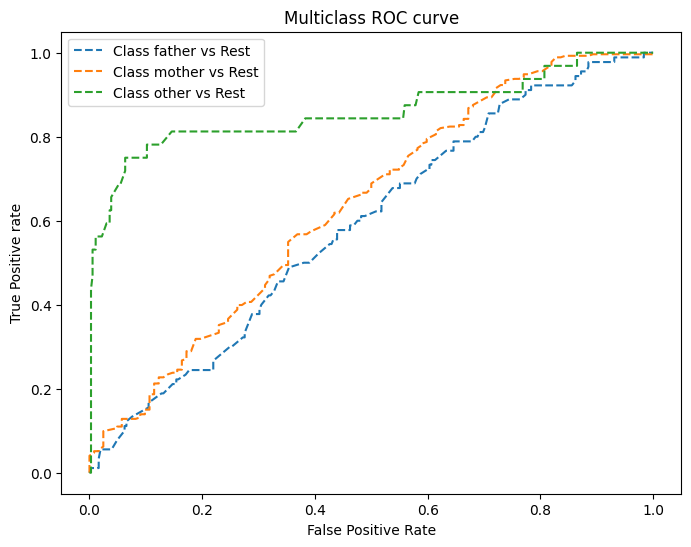

In [57]:
# ROC AUC Score
# Para problemas multiclase, se utiliza el enfoque One-vs-Rest
roc_auc = roc_auc_score(y, predicciones, multi_class='ovr')
print(f"ROC AUC Score: {roc_auc}")

# Curvas ROC para cada clase
fpr = {}
tpr = {}
thresh = {}

n_class = len(label_encoder.classes_)

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y, predicciones.iloc[:, i], pos_label=i)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
for i in range(n_class):
    plt.plot(fpr[i], tpr[i], linestyle='--', label=f'Class {label_encoder.classes_[i]} vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

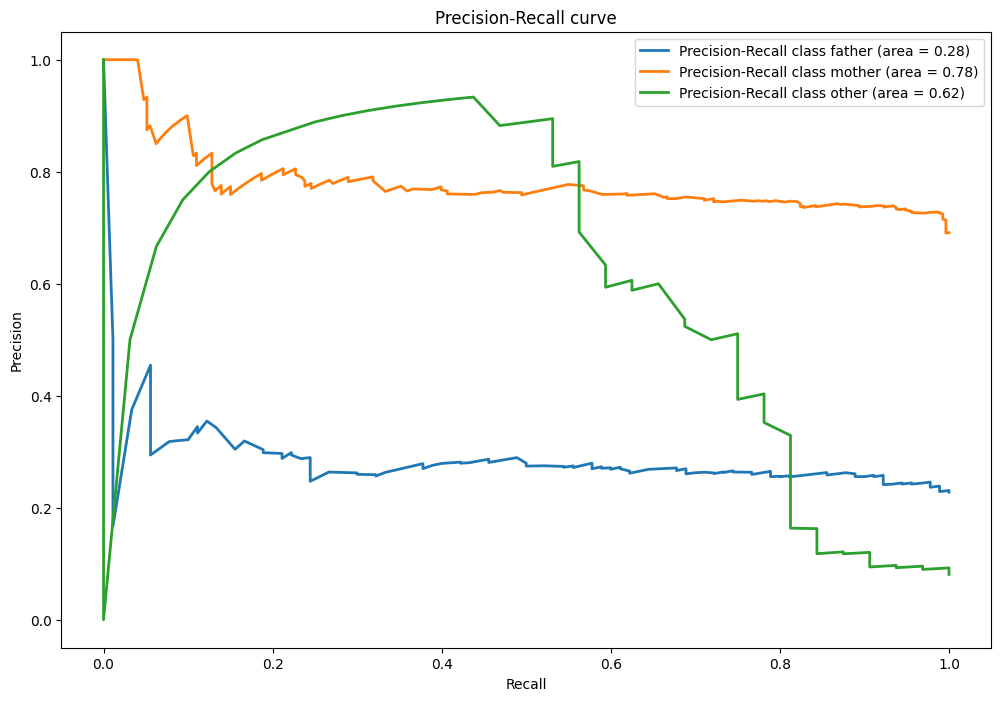

In [58]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
# Calcular Precisión y Recall
n_classes = len(label_encoder.classes_)
precision = dict()
recall = dict()
average_precision = dict()

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y == i, predicciones.iloc[:, i])
    average_precision[i] = average_precision_score(y == i, predicciones.iloc[:, i])

# Graficar Precision-Recall
plt.figure(figsize=(12, 8))

for i in range(n_classes):
    plt.plot(recall[i], precision[i], lw=2, label=f'Precision-Recall class {label_encoder.classes_[i]} (area = {average_precision[i]:0.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc='best')
plt.show()


Clase father - Mejor Umbral: 0.18, Mejor F1-Score: 0.40
Clase mother - Mejor Umbral: 0.55, Mejor F1-Score: 0.84
Clase other - Mejor Umbral: 0.95, Mejor F1-Score: nan


<ipython-input-59-6743f38886b6>:12: RuntimeWarning: invalid value encountered in divide
  f1_scores[i] = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i])


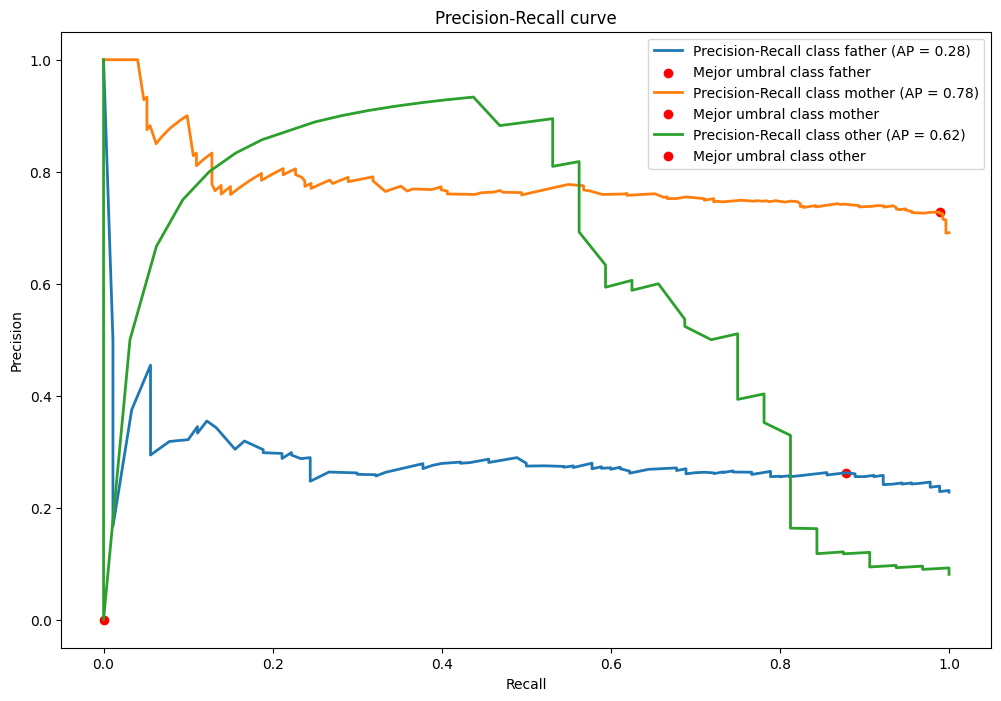

In [59]:
# Paso 6: Calcular Precisión, Recall y F1-Score
n_classes = len(label_encoder.classes_)
precision = dict()
recall = dict()
thresholds = dict()
f1_scores = dict()
best_threshold = dict()
best_f1_score = dict()

for i in range(n_classes):
    precision[i], recall[i], thresholds[i] = precision_recall_curve(y == i, predicciones.iloc[:, i])
    f1_scores[i] = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i])
    best_index = np.argmax(f1_scores[i])
    best_threshold[i] = thresholds[i][best_index]
    best_f1_score[i] = f1_scores[i][best_index]
    print(f"Clase {label_encoder.classes_[i]} - Mejor Umbral: {best_threshold[i]:.2f}, Mejor F1-Score: {best_f1_score[i]:.2f}")

# Paso 7: Graficar Precision-Recall
plt.figure(figsize=(12, 8))

for i in range(n_classes):
    plt.plot(recall[i], precision[i], lw=2, label=f'Precision-Recall class {label_encoder.classes_[i]} (AP = {average_precision_score(y == i, predicciones.iloc[:, i]):0.2f})')
    plt.scatter(recall[i][np.argmax(f1_scores[i])], precision[i][np.argmax(f1_scores[i])], marker='o', color='red', label=f'Mejor umbral class {label_encoder.classes_[i]}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc='best')
plt.show()

In [60]:
# Crear las Predicciones Binarias Basadas en los Mejores Umbrales
predicciones_binarias = np.zeros_like(predicciones)

for i in range(n_classes):
    predicciones_binarias[:, i] = predicciones.iloc[:, i] >= best_threshold[i]

# Asignar la Clase Predicha Basada en las Probabilidades Ajustadas por los Umbrales
# Nota: Si una observación no cumple ningún umbral, se asignará la clase con la mayor probabilidad predicha.
predicciones_finales = np.argmax(predicciones_binarias * predicciones.values, axis=1)

# Añadir las predicciones al DataFrame original
data_predicciones = data.copy()
data_predicciones['prediccion'] = predicciones_finales
data_predicciones['prediccion'] = label_encoder.inverse_transform(data_predicciones['prediccion'])

# Mostrar el DataFrame con las predicciones
print(data_predicciones.head(10))

   schoolsup  age address  guardian  studytime  activities  higher  internet  \
0          1   18       U         1          2           0       1         0   
1          0   17       U         0          2           0       1         1   
2          1   15       U         1          2           0       1         1   
3          0   15       U         1          3           1       1         1   
4          0   16       U         0          2           0       1         0   
5          0   16       U         1          2           1       1         1   
6          0   16       U         1          2           0       1         1   
7          1   17       U         1          2           0       1         0   
8          0   15       U         1          2           0       1         1   
9          0   15       U         1          2           1       1         1   

   romantic prediccion  
0         0     mother  
1         0     mother  
2         0     mother  
3         1     mot

In [61]:
data_predicciones['prediccion'].value_counts().sort_index()

prediccion
father     23
mother    371
other       1
Name: count, dtype: int64

In [62]:
# Confusion Matrix
conf_matrix = confusion_matrix(y, predicciones_finales)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[  4  86   0]
 [  2 270   1]
 [ 17  15   0]]


In [63]:
# Classification Report
class_report = classification_report(y, predicciones_finales, target_names=label_encoder.classes_)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

      father       0.17      0.04      0.07        90
      mother       0.73      0.99      0.84       273
       other       0.00      0.00      0.00        32

    accuracy                           0.69       395
   macro avg       0.30      0.34      0.30       395
weighted avg       0.54      0.69      0.60       395

